# Convolutional Neural Network for multi-class classification
###LeNet




## Introduction

This tutorial demonstrates the basic workflow of using TensorFlow with a simple CNN model. After loading the  MNIST data-set with images of hand-written digits, we define and optimize a simple mathematical model in TensorFlow. The results are then plotted and discussed.

You should be familiar with basic linear algebra, Python and the Jupyter Notebook editor. It also helps if you have a basic understanding of Machine Learning and classification.


## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
print(torch.__version__)
from torch import cuda
print(cuda.get_device_name(cuda.current_device()))

2.1.0+cu118
Tesla T4


## Load Data

The MNIST data-set is about 12 MB and will be downloaded automatically if it is not located in the given path.

#Setup the EPOCH and BATCH_SIZE values affect the training speed and model accuracy.
#Set Shuffle Flag True for the data shuffle the training data.

In [3]:
EPOCHS = 5

train_kwargs = {'batch_size': 128, 'shuffle': True}
valid_kwargs = {'batch_size': 128, 'shuffle': False}
test_kwargs = {'batch_size': 128, 'shuffle': False}

In [4]:
from torchvision import datasets, transforms

transform=transforms.Compose([
        # Pad images with 0s
        transforms.Pad((0,4,4,0), fill=0, padding_mode='constant'),

        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        ])
dataset_full = datasets.MNIST('../data', train=True, download=True,
                   transform=transform)
valid_size = 5000
train_size = len(dataset_full) - 5000
dataset_train, dataset_valid = torch.utils.data.random_split(dataset_full, [train_size, valid_size])

dataset_test = datasets.MNIST('../data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset_train,**train_kwargs)
valid_loader = torch.utils.data.DataLoader(dataset_valid,**valid_kwargs)
test_loader = torch.utils.data.DataLoader(dataset_test, **test_kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 223908139.96it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 10816652.72it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 73790759.97it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8004423.85it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:
print()
print("Image Shape: {}".format(dataset_train[0][0].shape))
print()
print("Training Set:   {} samples".format(len(dataset_train)))
print("Validation Set:   {} samples".format(len(dataset_valid)))
print("Test Set:       {} samples".format(len(dataset_test)))


Image Shape: torch.Size([1, 32, 32])

Training Set:   55000 samples
Validation Set:   5000 samples
Test Set:       10000 samples


The MNIST data-set has now been loaded and consists of 70.000 images and class-numbers for the images. The data-set is split into 3 mutually exclusive sub-sets. We will only use the training and test-sets in this tutorial.


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

Label of the image is:5


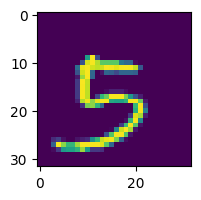

In [6]:
import pdb
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(dataset_train))
image = dataset_train[index][0].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print("Label of the image is:%d"%dataset_train[index][1])

#Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

#Architecture
##Layer 1: Convolutional.
####The output shape should be 28x28x6.

####Activation. Your choice of activation function.

####Pooling. The output shape should be 14x14x6.

#Layer 2: Convolutional.
####The output shape should be 10x10x16.

####Activation. Your choice of activation function.

####Pooling. The output shape should be 5x5x16.

####Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using pytorch flatten function, which is already imported for you.

#Layer 3: Fully Connected.
####This should have 120 outputs.
####Activation. Your choice of activation function.

#Layer 4: Fully Connected.
####This should have 84 outputs.

####Activation. Your choice of activation function.

#Layer 5: Fully Connected (Logits).
####This should have 10 outputs.






![alt text](https://cdn-images-1.medium.com/max/2200/1*1TI1aGBZ4dybR6__DI9dzA.png)

In [7]:
# Pytorch modification From https://www.kaggle.com/usingtc/lenet-with-pytorch

from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        self.conv1 = nn.Conv2d(1, 6, (5,5))
        # Layer 2: Convolutional. Output = 10x10x16.
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        self.fc1   = nn.Linear(400, 120)
        # Layer 4: Fully Connected. Input = 120. Output = 84.
        self.fc2   = nn.Linear(120, 84)
        # Layer 5: Fully Connected. Input = 84. Output = 10.
        self.fc3   = nn.Linear(84, 10)
    def forward(self, x):
        # Activation. # Pooling. Input = 28x28x6. Output = 14x14x6.
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
         # Activation. # Pooling. Input = 10x10x16. Output = 5x5x16.
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        # Flatten. Input = 5x5x16. Output = 400.
        x = x.flatten(start_dim=1)
        # Activation.
        x = F.relu(self.fc1(x))
        # Activation.
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

 ### One-Hot Encoding

The output-data is loaded as both integer class-numbers and so-called One-Hot encoded arrays. This means the class-numbers have been converted from a single integer to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is 1 and means the class is $i$. For example, the One-Hot encoded labels for the first 5 images in the test-set are:

#Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.



In [8]:
# Train & test part from https://github.com/activatedgeek/LeNet-5
def train(epoch):
    global cur_batch_win
    net.train()
    loss_list, batch_list = [], []
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)

        loss_list.append(loss.detach().cpu().item())
        batch_list.append(i+1)

        if i % 10 == 0:
            print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))

        loss.backward()
        optimizer.step()

In [9]:
net = LeNet()
print (net)

learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(net.parameters(), lr=learning_rate)
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#Function to Evaluate Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.




In [10]:
def evaluate(target_loader, target_dataset):
    predictions = []
    net.eval()
    total_correct = 0
    avg_loss = 0.0
    for i, (images, labels) in enumerate(target_loader):
        output = net(images)
        avg_loss += criterion(output, labels).sum()
        pred = output.detach().max(1)[1]
        total_correct += pred.eq(labels.view_as(pred)).sum()
        predictions.append(pred)

    avg_loss /= len(target_dataset)
    # print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss.detach().cpu().item(), float(total_correct) / len(data_test)))
    accuracy    = float(total_correct) / len(target_dataset)
    return accuracy, np.array(torch.cat(predictions))
    #or if you are in latest Pytorch world
    #return accuracy, np.array(torch.vstack(predictions))

#Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.



In [11]:
print("Training...")
print()
for e in range(1, EPOCHS):
    train(e)
    validation_accuracy, validation_predictions = evaluate(valid_loader, dataset_valid)
    print("EPOCH {} ...".format(e))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print()

torch.save(
    {
        'lenet': net.state_dict(),
        'opt': optimizer.state_dict(),
    },
    ('model_saved.model'),
)
print("Model saved")

Training...

Train - Epoch 1, Batch: 0, Loss: 2.308912
Train - Epoch 1, Batch: 10, Loss: 2.304553
Train - Epoch 1, Batch: 20, Loss: 2.305985
Train - Epoch 1, Batch: 30, Loss: 2.310978
Train - Epoch 1, Batch: 40, Loss: 2.311763
Train - Epoch 1, Batch: 50, Loss: 2.302057
Train - Epoch 1, Batch: 60, Loss: 2.303818
Train - Epoch 1, Batch: 70, Loss: 2.300699
Train - Epoch 1, Batch: 80, Loss: 2.302434
Train - Epoch 1, Batch: 90, Loss: 2.292211
Train - Epoch 1, Batch: 100, Loss: 2.296687
Train - Epoch 1, Batch: 110, Loss: 2.298886
Train - Epoch 1, Batch: 120, Loss: 2.297152
Train - Epoch 1, Batch: 130, Loss: 2.303875
Train - Epoch 1, Batch: 140, Loss: 2.296850
Train - Epoch 1, Batch: 150, Loss: 2.303003
Train - Epoch 1, Batch: 160, Loss: 2.301262
Train - Epoch 1, Batch: 170, Loss: 2.300267
Train - Epoch 1, Batch: 180, Loss: 2.294592
Train - Epoch 1, Batch: 190, Loss: 2.300805
Train - Epoch 1, Batch: 200, Loss: 2.298126
Train - Epoch 1, Batch: 210, Loss: 2.293584
Train - Epoch 1, Batch: 220, L

#Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.



In [12]:
test_accuracy, test_predictions = evaluate(test_loader, dataset_test)
print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.266


#Functions for visualisations



In [13]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    img_shape = (32, 32)

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [14]:
#Direct access to dataset object is absolutely not recommended in bigger dataset.
y_test = []
for i, (images, labels) in enumerate(test_loader):
    y_test.append(labels)

X_test = []
for i, (images, labels) in enumerate(test_loader):
    X_test.append(images)
X_test = torch.cat(X_test)

<ipython-input-15-79c72c28913a>:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cls_pred=cls_pred[0:9].astype(np.int))


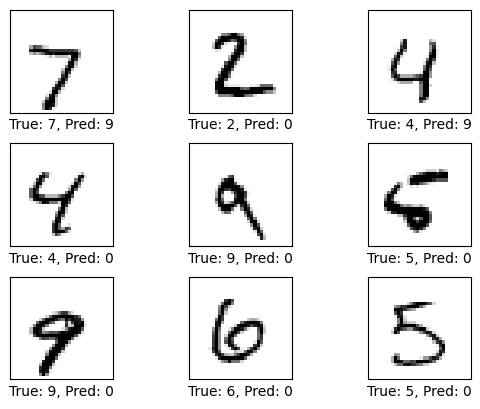

In [15]:

def plot_example_errors(y_pred, y_true):
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct_prediction = np.equal(y_pred, y_true)

    # Negate the boolean array.
    incorrect = np.equal(correct_prediction, False).bool()

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]

    # Get the predicted classes for those images.
    cls_pred = y_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_true[incorrect]

    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9].astype(np.int))

plot_example_errors(test_predictions, torch.cat(y_test))

License (MIT)
Copyright (c) 2016 by Magnus Erik Hvass Pedersen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
